In [ ]:
import zipfile
import os
zip_path = "/content/drive/MyDrive/Fingerprints.zip"
extract_path = "/content/Fingerprints"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {os.path.abspath(extract_path)}")


Dataset extracted to: /content/Fingerprints


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from collections import defaultdict
from PIL import Image
import os


In [ ]:

# Dataset path
dataset_root = "/content/Fingerprints/dataset"


In [ ]:

# Prepare containers
class_counts = defaultdict(int)
image_shapes = defaultdict(int)



In [ ]:
import os
import matplotlib.pyplot as plt
dataset_dir = "/content/Fingerprints/dataset"
class_counts_dict = {}
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for class_name in sorted(os.listdir(dataset_dir)):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        count = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(image_extensions)
        ])
        class_counts_dict[class_name] = count
total_images = sum(class_counts_dict.values())
print("✅ Total Images in Dataset:", total_images)
print("✅ Image Count per Class:")
for cls, count in class_counts_dict.items():
    print(f"   {cls}: {count}")


✅ Total Images in Dataset: 8000
✅ Image Count per Class:
   A+: 1000
   A-: 1000
   AB+: 1000
   AB-: 1000
   B+: 1000
   B-: 1000
   O+: 1000
   O-: 1000


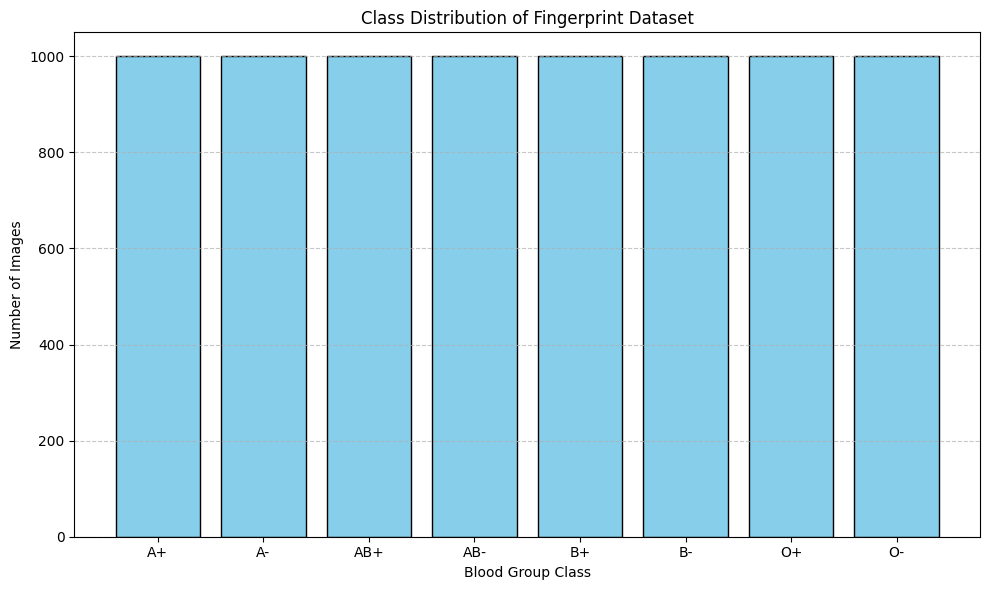

In [ ]:

# Plotting
labels = list(class_counts_dict.keys())
counts = list(class_counts_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xlabel('Blood Group Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Fingerprint Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import os
from PIL import Image
from collections import Counter
dataset_path = "/content/Fingerprints/dataset"
image_shapes = Counter()
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    for filename in os.listdir(class_dir):
        if filename.lower().endswith(image_extensions):
            img_path = os.path.join(class_dir, filename)
            try:
                with Image.open(img_path) as img:
                    image_shapes[img.size] += 1
            except Exception as e:
                print(f"❌ Could not read {img_path}: {e}")
print("\n🖼️ Image Sizes:\n")
if image_shapes:
    for size, count in image_shapes.items():
        print(f"Size {size[0]}x{size[1]}: {count} images")
else:
    print("No images found or failed to read any image.")



🖼️ Image Sizes:

Size 96x103: 7939 images
Size 241x298: 59 images
Size 103x96: 2 images


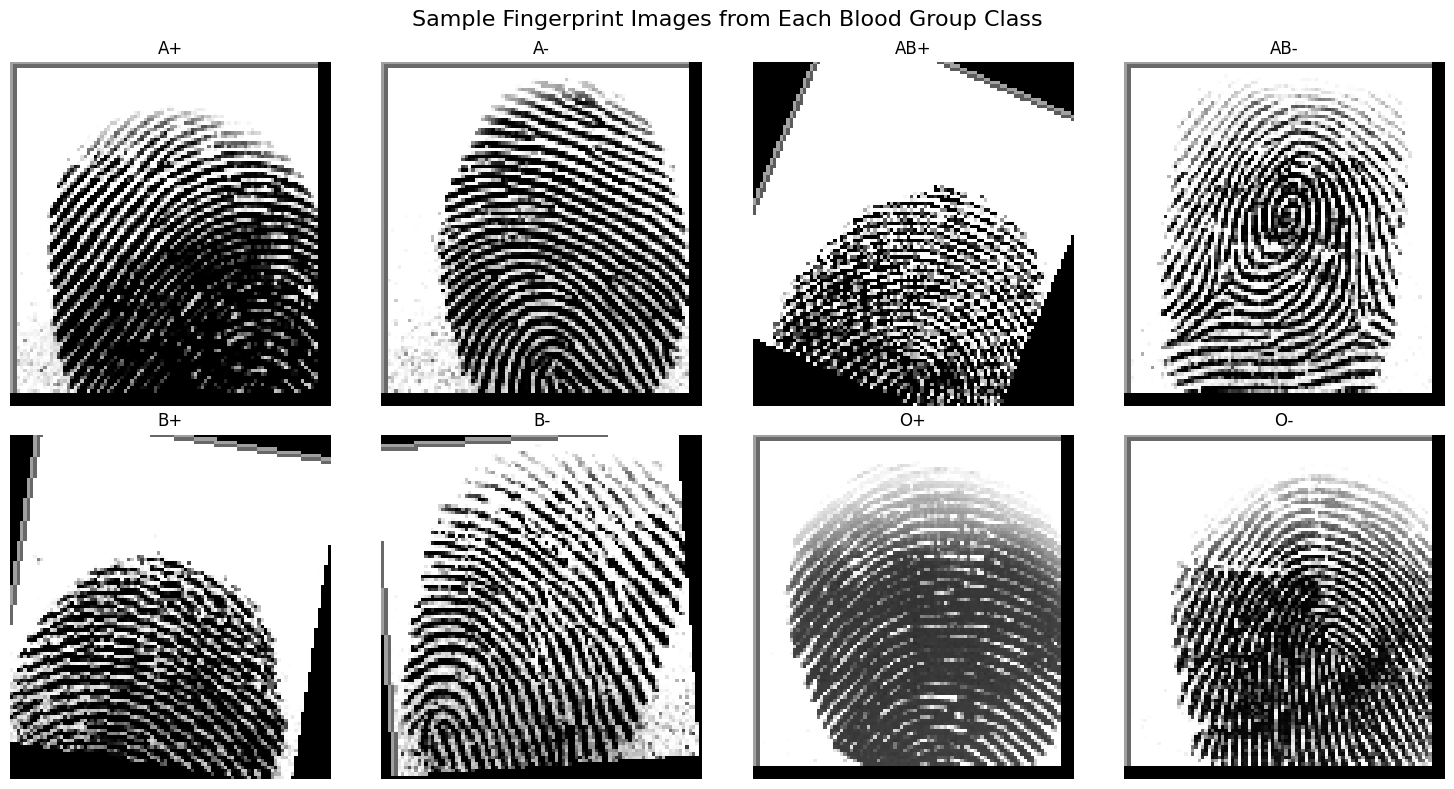

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
dataset_root = "/content/Fingerprints/dataset"
sample_images = []
labels = []

for label_folder in sorted(os.listdir(dataset_root)):
    class_path = os.path.join(dataset_root, label_folder)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            if file.lower().endswith(('.bmp', '.jpg', '.png', '.jpeg')):
                sample_images.append(os.path.join(class_path, file))
                labels.append(label_folder)
                break
plt.figure(figsize=(15, 8))
for i, img_path in enumerate(sample_images):
    img = Image.open(img_path).convert("L")
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

plt.suptitle("Sample Fingerprint Images from Each Blood Group Class", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
original_dataset_dir = "/content/Fingerprints/dataset"
split_dataset_dir = "content/Fingerprints/split_dataset"
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
image_paths = []
labels = []

for class_name in os.listdir(original_dataset_dir):
    class_dir = os.path.join(original_dataset_dir, class_name)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            if file_name.lower().endswith(image_extensions):
                image_paths.append(os.path.join(class_dir, file_name))
                labels.append(class_name)

# Split dataset: 70% train, 15% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    image_paths, labels, test_size=0.15, stratify=labels, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42
)

def copy_files(image_list, labels_list, split_name):
    for img_path, label in zip(image_list, labels_list):
        dst_dir = os.path.join(split_dataset_dir, split_name, label)
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy(img_path, os.path.join(dst_dir, os.path.basename(img_path)))
copy_files(X_train, y_train, 'train')
copy_files(X_val, y_val, 'val')
copy_files(X_test, y_test, 'test')

print("✅ Dataset successfully split into train/val/test with class balance.")


✅ Dataset successfully split into train/val/test with class balance.


In [ ]:
import shutil
split_dataset_dir = "/content/content/Fingerprints/split_dataset"
output_zip_path = "content/Fingerprints_split_dataset.zip"
shutil.make_archive(base_name=output_zip_path.replace(".zip", ""),
                    format='zip',
                    root_dir=split_dataset_dir)

print(f"✅ Zipped dataset created at: {output_zip_path}")


✅ Zipped dataset created at: content/Fingerprints_split_dataset.zip


In [ ]:
import zipfile
import os
zip_path = "/content/content/Fingerprints_split_dataset.zip"
extract_path = "/content/Fingerprints_split_dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {os.path.abspath(extract_path)}")


Dataset extracted to: /content/Fingerprints_split_dataset


In [ ]:
import os
base_dir = "/content/Fingerprints_split_dataset"
splits = ['train', 'val', 'test']
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for split in splits:
    split_dir = os.path.join(base_dir, split)
    total_images = 0
    print(f"\n📁 {split.upper()} Set:")

    for class_name in os.listdir(split_dir):
        class_dir = os.path.join(split_dir, class_name)
        if os.path.isdir(class_dir):
            num_images = len([
                f for f in os.listdir(class_dir)
                if f.lower().endswith(image_extensions)
            ])
            total_images += num_images
            print(f"  🔸 Class {class_name}: {num_images} images")

    print(f"✅ Total images in {split} set: {total_images}")



📁 TRAIN Set:
  🔸 Class A-: 700 images
  🔸 Class A+: 700 images
  🔸 Class O+: 699 images
  🔸 Class B-: 700 images
  🔸 Class O-: 700 images
  🔸 Class AB+: 700 images
  🔸 Class AB-: 700 images
  🔸 Class B+: 700 images
✅ Total images in train set: 5599

📁 VAL Set:
  🔸 Class A-: 150 images
  🔸 Class A+: 150 images
  🔸 Class O+: 151 images
  🔸 Class B-: 150 images
  🔸 Class O-: 150 images
  🔸 Class AB+: 150 images
  🔸 Class AB-: 150 images
  🔸 Class B+: 150 images
✅ Total images in val set: 1201

📁 TEST Set:
  🔸 Class A-: 150 images
  🔸 Class A+: 150 images
  🔸 Class O+: 150 images
  🔸 Class B-: 150 images
  🔸 Class O-: 150 images
  🔸 Class AB+: 150 images
  🔸 Class AB-: 150 images
  🔸 Class B+: 150 images
✅ Total images in test set: 1200


In [ ]:
%env CUDA_LAUNCH_BLOCKING=1

env: CUDA_LAUNCH_BLOCKING=1


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.models import resnet34, ResNet34_Weights
from torch.utils.data import DataLoader
import os

# Debugging: Catch CUDA errors immediately
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Paths
train_dir = '/content/Fingerprints_split_dataset/train'
val_dir = '/content/Fingerprints_split_dataset/val'
test_dir = '/content/Fingerprints_split_dataset/test'

# Hyperparameters
batch_size = 32
num_epochs = 50
learning_rate = 0.001

# Data transforms
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

val_test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(val_dir, transform=val_test_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transform)

# Ensure consistent class_to_idx
class_to_idx = train_dataset.class_to_idx
val_dataset.class_to_idx = class_to_idx
test_dataset.class_to_idx = class_to_idx
print("Class to index mapping:", class_to_idx)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_classes = len(class_to_idx)
print(f"Detected {num_classes} classes: {list(class_to_idx.keys())}")

# -------------------------
# CBAM Attention Modules
# -------------------------
class ChannelAttention(nn.Module):
    def __init__(self, in_planes, ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc = nn.Sequential(
            nn.Conv2d(in_planes, in_planes // ratio, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_planes // ratio, in_planes, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        return x * self.sigmoid(avg_out + max_out)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        padding = kernel_size // 2
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x_cat = torch.cat([avg_out, max_out], dim=1)
        return x * self.sigmoid(self.conv(x_cat))

class CBAM(nn.Module):
    def __init__(self, in_planes, ratio=16, kernel_size=7):
        super(CBAM, self).__init__()
        self.channel_attention = ChannelAttention(in_planes, ratio)
        self.spatial_attention = SpatialAttention(kernel_size)

    def forward(self, x):
        x = self.channel_attention(x)
        x = self.spatial_attention(x)
        return x

# -------------------------
# Modified ResNet-34 + CBAM
# -------------------------
class ResNet34_CBAM(nn.Module):
    def __init__(self, num_classes):
        super(ResNet34_CBAM, self).__init__()
        base_model = resnet34(weights=ResNet34_Weights.DEFAULT)

        self.conv1 = base_model.conv1
        self.bn1 = base_model.bn1
        self.relu = base_model.relu
        self.maxpool = base_model.maxpool

        self.layer1 = base_model.layer1
        self.layer2 = base_model.layer2
        self.layer3 = nn.Sequential(base_model.layer3, CBAM(in_planes=256))
        self.layer4 = nn.Sequential(base_model.layer4, CBAM(in_planes=512))

        self.avgpool = base_model.avgpool
        self.fc = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# -------------------------
# Initialize Model
# -------------------------
model = ResNet34_CBAM(num_classes=num_classes).to(device)

# Loss function with label smoothing
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

# Optimizer and learning rate scheduler
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

# -------------------------
# Training and Validation
# -------------------------
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_acc = 100 * correct / total
    print(f"Validation Accuracy: {val_acc:.2f}%")

    scheduler.step()

# -------------------------
# Final Testing
# -------------------------
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

test_acc = 100 * correct / total
print(f"Test Accuracy: {test_acc:.2f}%")


Using device: cuda
Class to index mapping: {'A+': 0, 'A-': 1, 'AB+': 2, 'AB-': 3, 'B+': 4, 'B-': 5, 'O+': 6, 'O-': 7}
Detected 8 classes: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 119MB/s]


Epoch [1/50], Loss: 1.5874, Train Acc: 40.60%
Validation Accuracy: 48.63%
Epoch [2/50], Loss: 1.4264, Train Acc: 49.15%
Validation Accuracy: 71.44%
Epoch [3/50], Loss: 1.2772, Train Acc: 59.89%
Validation Accuracy: 67.28%
Epoch [4/50], Loss: 1.1851, Train Acc: 64.73%
Validation Accuracy: 56.87%
Epoch [5/50], Loss: 1.1229, Train Acc: 68.37%
Validation Accuracy: 73.61%
Epoch [6/50], Loss: 1.1244, Train Acc: 67.92%
Validation Accuracy: 80.18%
Epoch [7/50], Loss: 1.0864, Train Acc: 70.08%
Validation Accuracy: 75.77%
Epoch [8/50], Loss: 1.0610, Train Acc: 71.05%
Validation Accuracy: 79.68%
Epoch [9/50], Loss: 1.0422, Train Acc: 71.69%
Validation Accuracy: 81.77%
Epoch [10/50], Loss: 0.9953, Train Acc: 74.66%
Validation Accuracy: 76.02%
Epoch [11/50], Loss: 0.9986, Train Acc: 74.48%
Validation Accuracy: 80.52%
Epoch [12/50], Loss: 0.9786, Train Acc: 75.30%
Validation Accuracy: 78.68%
Epoch [13/50], Loss: 0.9637, Train Acc: 75.94%
Validation Accuracy: 83.35%
Epoch [14/50], Loss: 0.9513, Train

In [ ]:
# Prediction on multiple test images with counting correct and wrong predictions
import glob

def predict_images_with_labels(test_images_folder, model, class_to_idx, transform):
    model.eval()
    idx_to_class = {v: k for k, v in class_to_idx.items()}

    image_paths = []
    for cls in os.listdir(test_images_folder):
        cls_folder = os.path.join(test_images_folder, cls)
        if os.path.isdir(cls_folder):
            for img_file in os.listdir(cls_folder):
                image_paths.append((os.path.join(cls_folder, img_file), cls))

    correct = 0
    total = 0

    for img_path, true_label in image_paths:
        image = Image.open(img_path)
        image_tensor = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image_tensor)
            probabilities = torch.softmax(output, dim=1)
            confidence, predicted_class = torch.max(probabilities, 1)
            predicted_label = idx_to_class[predicted_class.item()]
            confidence_score = confidence.item() * 100

            is_correct = predicted_label == true_label
            result = "Correct" if is_correct else "Wrong"
            print(f"Image: {os.path.basename(img_path)} -> Predicted: {predicted_label} (Confidence: {confidence_score:.2f}%) | Actual: {true_label} -> {result}")

            total += 1
            if is_correct:
                correct += 1

    print(f"Total Images: {total}, Correct Predictions: {correct}, Wrong Predictions: {total - correct}")
    accuracy = 100 * correct / total if total > 0 else 0
    print(f"Custom Test Accuracy: {accuracy:.2f}%")

# Usage example
test_images_folder = '/content/Fingerprints_split_dataset/test'  # Replace with your folder path
predict_images_with_labels(test_images_folder, model, class_to_idx, val_test_transform)


Image: cluster_1_5624.BMP -> Predicted: A- (Confidence: 88.78%) | Actual: A- -> Correct
Image: cluster_1_3846.BMP -> Predicted: A- (Confidence: 85.21%) | Actual: A- -> Correct
Image: cluster_1_2654.BMP -> Predicted: A- (Confidence: 85.96%) | Actual: A- -> Correct
Image: cluster_1_5126.BMP -> Predicted: A- (Confidence: 86.40%) | Actual: A- -> Correct
Image: cluster_1_4326.BMP -> Predicted: A- (Confidence: 90.70%) | Actual: A- -> Correct
Image: cluster_1_2888.BMP -> Predicted: O+ (Confidence: 66.83%) | Actual: A- -> Wrong
Image: cluster_1_3961.BMP -> Predicted: A- (Confidence: 85.01%) | Actual: A- -> Correct
Image: cluster_1_2768.BMP -> Predicted: A- (Confidence: 85.78%) | Actual: A- -> Correct
Image: cluster_1_4551.BMP -> Predicted: A- (Confidence: 58.50%) | Actual: A- -> Correct
Image: cluster_1_3083.BMP -> Predicted: A- (Confidence: 44.03%) | Actual: A- -> Correct
Image: cluster_1_73.BMP -> Predicted: A- (Confidence: 88.86%) | Actual: A- -> Correct
Image: cluster_1_45.BMP -> Predicted

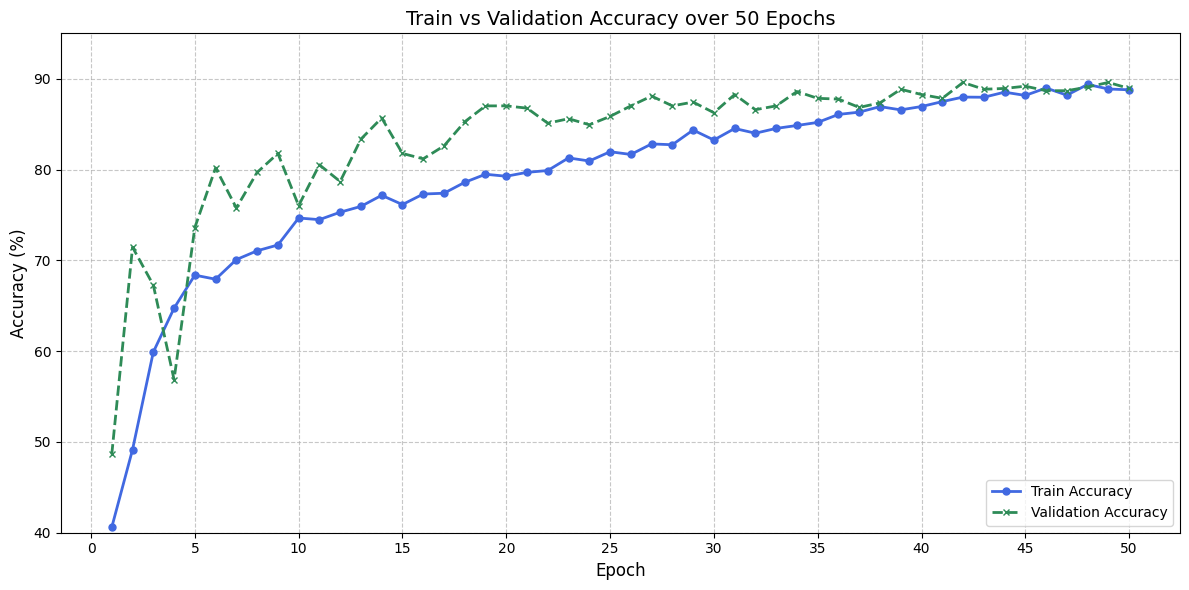

In [ ]:
import matplotlib.pyplot as plt

# Training and validation accuracy values
train_acc_list = [
    40.60, 49.15, 59.89, 64.73, 68.37, 67.92, 70.08, 71.05, 71.69, 74.66,
    74.48, 75.30, 75.94, 77.16, 76.14, 77.30, 77.39, 78.59, 79.48, 79.26,
    79.69, 79.89, 81.28, 80.94, 81.96, 81.66, 82.82, 82.73, 84.35, 83.25,
    84.52, 84.00, 84.53, 84.85, 85.19, 86.07, 86.32, 86.93, 86.57, 86.94,
    87.48, 87.98, 87.96, 88.52, 88.16, 88.98, 88.19, 89.37, 88.87, 88.78
]

val_acc_list = [
    48.63, 71.44, 67.28, 56.87, 73.61, 80.18, 75.77, 79.68, 81.77, 76.02,
    80.52, 78.68, 83.35, 85.68, 81.77, 81.18, 82.60, 85.26, 87.01, 87.01,
    86.76, 85.10, 85.60, 84.93, 85.85, 87.01, 88.09, 87.01, 87.43, 86.26,
    88.26, 86.59, 87.01, 88.59, 87.84, 87.76, 86.84, 87.34, 88.84, 88.26,
    87.84, 89.59, 88.84, 88.93, 89.18, 88.68, 88.68, 89.09, 89.59, 88.93
]

# Epochs
epochs = range(1, 51)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc_list, marker='o', linestyle='-', linewidth=2, markersize=5,
         label='Train Accuracy', color='royalblue')
plt.plot(epochs, val_acc_list, marker='x', linestyle='--', linewidth=2, markersize=5,
         label='Validation Accuracy', color='seagreen')

# Title and labels
plt.title('Train vs Validation Accuracy over 50 Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Axis formatting
plt.xticks(range(0, 51, 5))
plt.ylim(40, 95)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Make sure your model is already loaded with best weights
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [ ]:
# Get class names from dataset
class_names = list(class_to_idx.keys())

cm = confusion_matrix(all_labels, all_preds)


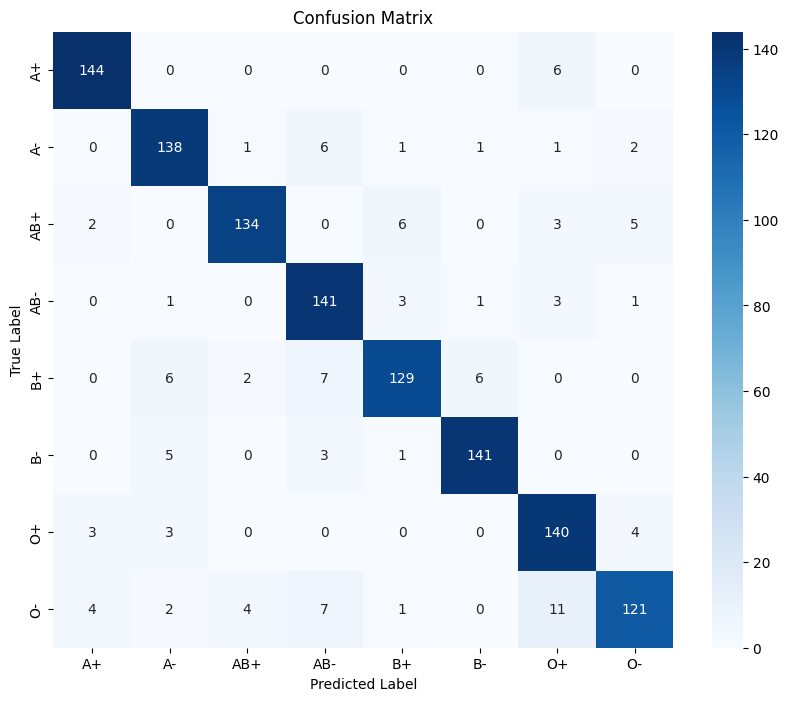

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(model)

ResNet34_CBAM(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=T